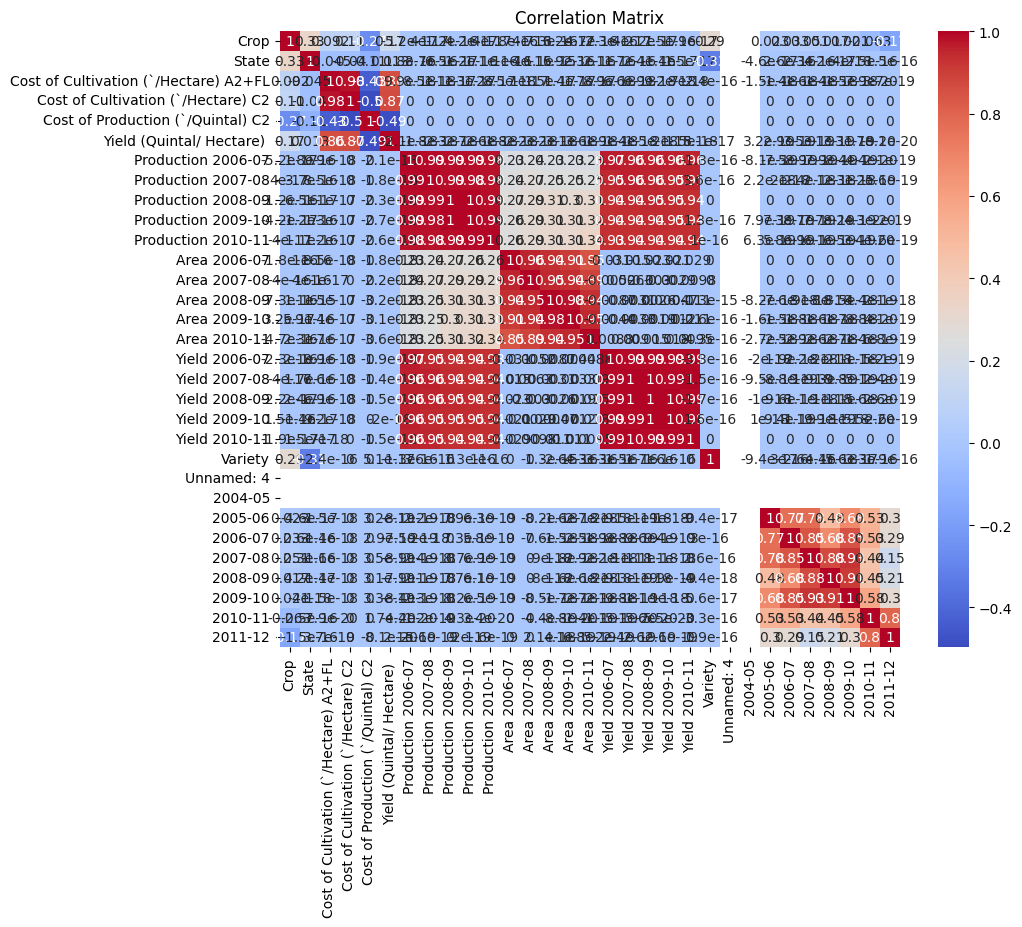

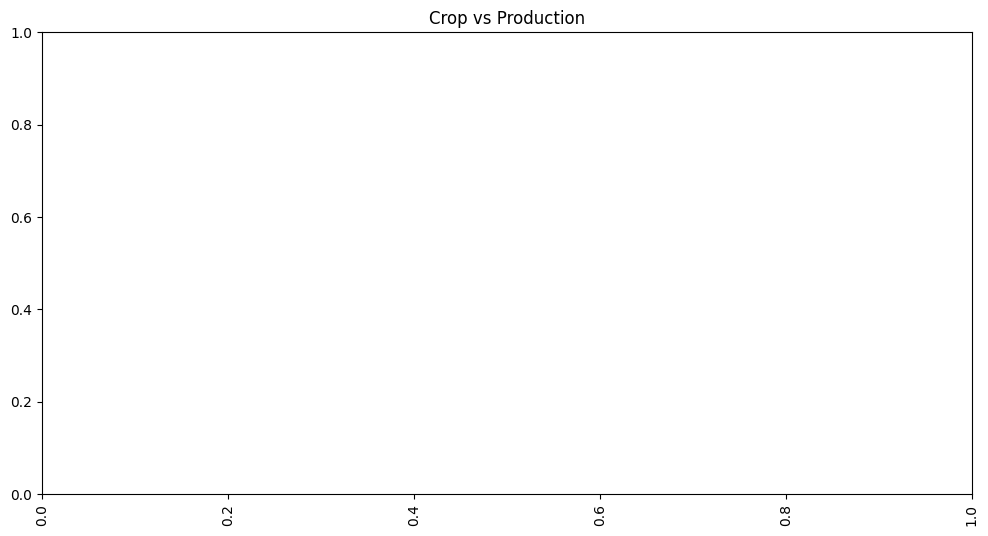

The model cannot be trained due to missing 'Production' data.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import joblib

data1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project4_Ag_Prediction of Agriculture Crop Production In India/datafile (1).csv")
data2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project4_Ag_Prediction of Agriculture Crop Production In India/datafile (2).csv")
data3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project4_Ag_Prediction of Agriculture Crop Production In India/datafile (3).csv")
data4 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project4_Ag_Prediction of Agriculture Crop Production In India/datafile.csv")

data = pd.concat([data1, data2, data3, data4], ignore_index=True)

data = data.drop(columns=['Recommended Zone', 'Unit'], errors='ignore')
data.fillna(data.mean(numeric_only=True), inplace=True)

label_encoder = LabelEncoder()
categorical_columns = ['Crop', 'Variety', 'State', 'Season']
for column in categorical_columns:
    if column in data.columns:
        data[column] = label_encoder.fit_transform(data[column])

numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

plt.figure(figsize=(12, 6))
if 'Production' in data.columns:
    sns.barplot(data=data, x='Crop', y='Production')
plt.title("Crop vs Production")
plt.xticks(rotation=90)
plt.show()

X = data.drop('Production', axis=1, errors='ignore')
y = data['Production'] if 'Production' in data.columns else None

if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred_lr = lr_model.predict(X_test)
    print("Linear Regression Model Performance")
    print("MSE:", mean_squared_error(y_test, y_pred_lr))
    print("R2 Score:", r2_score(y_test, y_pred_lr))

    y_pred_rf = rf_model.predict(X_test)
    print("Random Forest Model Performance")
    print("MSE:", mean_squared_error(y_test, y_pred_rf))
    print("R2 Score:", r2_score(y_test, y_pred_rf))

    joblib.dump(rf_model, "crop_production_model.pkl")

    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label="Actual Values")
    plt.plot(y_pred_rf, label="Predicted Values - RF")
    plt.title("Actual vs Predicted Crop Production")
    plt.legend()
    plt.show()
else:
    print("The model cannot be trained due to missing 'Production' data.")
